In [1]:
from sklearn import datasets   #importing datsets from sklearn 
import pandas as pd #it is used for data analysis and data manipulation
import matplotlib.pyplot as plt #used for plotting data
import numpy as np # used for solving mathematical problems
from sklearn.datasets import load_iris#loading data of irsi flower
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
iris=datasets.load_iris()


In [3]:
data=pd.DataFrame(data=np.c_[iris['data'],iris['target'] ],columns=iris['feature_names']+['target'])

In [4]:
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
color=['red','green','blue']

In [6]:
data=data.iloc[:,:-1] #as the type of algorithm is unsupervised the target is not present (ie.target shows zero) so to remove
#or delete that column iloc is used 

In [7]:
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data.shape


(150, 4)

In [9]:
from sklearn.cluster import KMeans

In [10]:
model=KMeans(n_clusters=3)
model.fit(data.iloc[:,2:])


KMeans(n_clusters=3)

In [11]:
a=model.cluster_centers_

In [12]:
data.shape  #shape: A shape tuple (integer), not including the batch size. 
#For instance, shape=(32,) indicates that the expected input will 
#be batches of 32-dimensional vectors.


(150, 4)

In [13]:
a

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

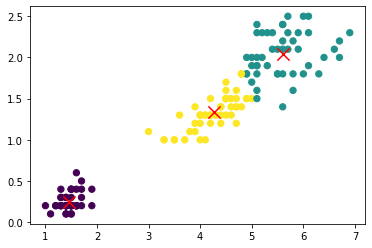

In [14]:
plt.scatter(data.iloc[:,2],data.iloc[:,3],s=40,c=model.labels_)#
plt.scatter(a[:,0],a[:,1],marker='x',color='r',s=150)
plt.show()

In [15]:
#EVENING SESSION TENSORFLOW
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
mnist=keras.datasets.mnist

In [17]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [18]:
train_labels[0]

5

In [19]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

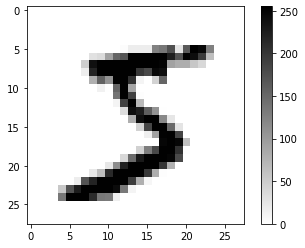

In [20]:
plt.figure()
plt.imshow(train_images[0],plt.cm.binary) #change 0 to say any number
plt.colorbar() #0to 5999
plt.grid(False)            

In [21]:
#NORMALIZATION
train_images =train_images/255.0
test_images  =test_images/255.0

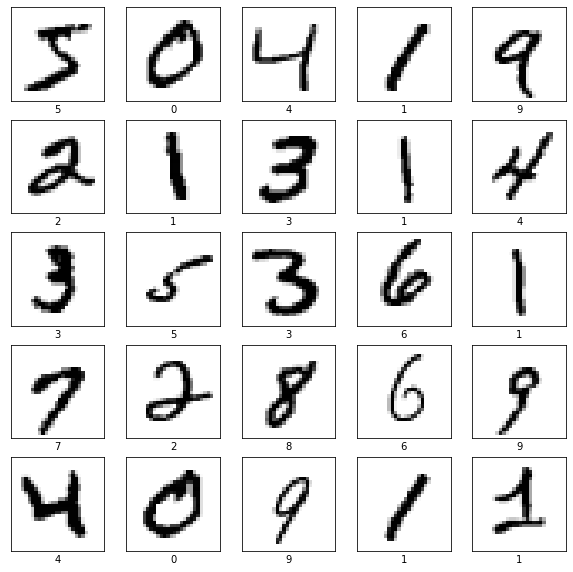

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [23]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)])
#The core data structure of Keras is a model, a way to organize layers. 
#The simplest type of model is the Sequential model, a linear stack of layers
#Dense implements the operation: output = activation(dot(input, kernel) + bias) 
#where activation is the element-wise activation function passed as the activation argument,
#kernel is a weights matrix created by the layer, and bias is a bias vector created by the 
#layer (only applicable if use_bias is True).


In [24]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
tb_callback=keras.callbacks.TensorBoard(log_dir='./Graph',histogram_freq=0,write_graph=True,write_images=True)

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'AdamOptimizer'

In [37]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.fit(train_images,train_labels,epochs=20,callbacks=[tb_callback], validation_data=[test_images,test_labels])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2027 - acc: 0.9398 - val_loss: 0.1104 - val_acc: 0.9665
Epoch 2/20
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0848 - acc: 0.9737 - val_loss: 0.0825 - val_acc: 0.9756
Epoch 3/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0591 - acc: 0.9807 - val_loss: 0.0734 - val_acc: 0.9780
Epoch 4/20
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0638 - val_acc: 0.9816
Epoch 5/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0337 - acc: 0.9885 - val_loss: 0.0865 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0298 - acc: 0.9898 - val_loss: 0.0726 - val_acc: 0.9811
Epoch 7/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0243 - acc: 0.9923 - val_loss: 0.0777 - va

In [43]:
predictions = model.predict(test_images)

NameError: name 'predictions' is not defined